# Ensemble Evaluation: Timepoint 3 - Winter 2022

Location: New York State

Timepoint 3: January 4, 2022. Setting: New York State.

## Set up for ensemble modeling

### Load dependencies

In [1]:
from pyciemss.utils.ensemble_eval_utils import * 

### Collect relevant models
<!-- We have chosen x number of models to capture the relevant COVID-19 dynamics for this setting. 
 - `model1` contains compartments SEIRHD, and is stratified by age into four groups.
 - `model2` is the same as `model1`, but allows for reinfection
 - `model3` is the same as `model1`, but with a variation in transmission rate to account for masking efficacy and compliance. -->

In [2]:
model1 = "../../notebook/ensemble_eval_sa/operative_models/SEIRHD_npi1_forT3.json"
model2 = "../../notebook/ensemble_eval_sa/operative_models/SEIRHD_npi1_age_stratified_v2_forT3.json"
model3 = "../../notebook/ensemble_eval_sa/operative_models/SEIRHD_npi1_age_stratified_v3_forT3.json"

# from mira.sources.askenet import model_from_url
# model1 = model_from_url('https://raw.githubusercontent.com/ciemss/pyciemss/sa-ensemble-eval/notebook/ensemble_eval_sa/operative_models/SEIRHD_npi1_forT3.json')
# model2 = model_from_url('https://raw.githubusercontent.com/ciemss/pyciemss/sa-ensemble-eval/notebook/ensemble_eval_sa/operative_models/SEIRHD_npi1_age_stratified_v2_forT3.json')
# model3 = model_from_url('https://raw.githubusercontent.com/ciemss/pyciemss/sa-ensemble-eval/notebook/ensemble_eval_sa/operative_models/SEIRHD_npi1_age_stratified_v3_forT3.json')

### Gather source data and set `DATA_PATH`, `RESULTS_PATH`

In [3]:
url = 'https://raw.githubusercontent.com/DARPA-ASKEM/experiments/main/thin-thread-examples/milestone_12month/evaluation/ensemble_eval_SA/datasets/aabb3684-a7ea-4f60-98f1-a8e673ad6df5/dataset.csv'
nys_data = pd.read_csv(url)
nys_data["E"] = np.nan # Add empty "E" column so that "exposed" may be used to post-process results
nys_data["I0"] = np.nan
nys_data["I1"] = np.nan
nys_data["I2"] = np.nan
nys_data["I3"] = np.nan
nys_data["H0"] = np.nan
nys_data["H1"] = np.nan
nys_data["H2"] = np.nan
nys_data["H3"] = np.nan

DATA_PATH = "../../notebook/ensemble_eval_sa/datasets/"
RESULTS_PATH = "../../notebook/ensemble_eval_sa/ensemble_results/"
FIGURE_PATH = "../../notebook/ensemble_eval_sa/figures/"

### Create and save datasets and simulation timepoints for each forecast

In [4]:
### Forecast 1: 01/04/2022 - 02/01/2022, data: 12/01/2021 - 01/03/2022

# Forecast 1: 01/04/2022 (day 34, row 714) - 02/01/2022 (day 62, row 742), train data: 12/01/2021 (day 0, row 680) - 01/03/2022 (day 33, row 713)
[all_data1, train_data1, timepoints1] = data_selector_function(nys_data, 679, 713, 742)
train_data1[["I", "E", "H", "D", "I0", "I1", "I2", "I3", "H0", "H1", "H2", "H3"]].to_csv(DATA_PATH + "NYS_T3_forecast1.csv")

### Forecast 2: 01/11/2022 - 02/08/2022, data: 12/01/2021 - 01/10/2022

# Forecast 2: 01/11/2022 (day 41, row 548) - 02/08/2022 (day 69, row 749), train data: 12/01/2021 (day 0, row 680) - 01/10/2022 (day 40, row 720)
[all_data2, train_data2, timepoints2] = data_selector_function(nys_data, 679, 720, 749)
train_data2[["I", "E", "H", "D", "I0", "I1", "I2", "I3", "H0", "H1", "H2", "H3"]].to_csv(DATA_PATH + "NYS_T3_forecast2.csv")

### Forecast 3: 01/18/2022 - 02/15/2022, data: 12/01/2021 - 01/17/2022

# Forecast 3: 01/18/2022 (day 48, row 555) - 02/15/2022 (day 76, row 756), train data: 12/01/2021 (day 0, row 680) - 01/17/2022 (day 47, row 727)
[all_data3, train_data3, timepoints3] = data_selector_function(nys_data, 679, 727, 756)
train_data3[["I", "E", "H", "D", "I0", "I1", "I2", "I3", "H0", "H1", "H2", "H3"]].to_csv(DATA_PATH + "NYS_T3_forecast3.csv")

### Forecast 4: 01/25/2022 - 02/22/2022, data: 12/01/2021 - 01/24/2022

# Forecast 4: 01/25/2022 (day 45, row 562) - 02/22/2022 (day 83, row 763), train data: 12/01/2021 (day 0, row 680) - 01/24/2022 (day 44, row 734)
[all_data4, train_data4, timepoints4] = data_selector_function(nys_data, 679, 734, 763)
train_data4[["I", "E", "H", "D", "I0", "I1", "I2", "I3", "H0", "H1", "H2", "H3"]].to_csv(DATA_PATH + "NYS_T3_forecast4.csv")

### Plot the data

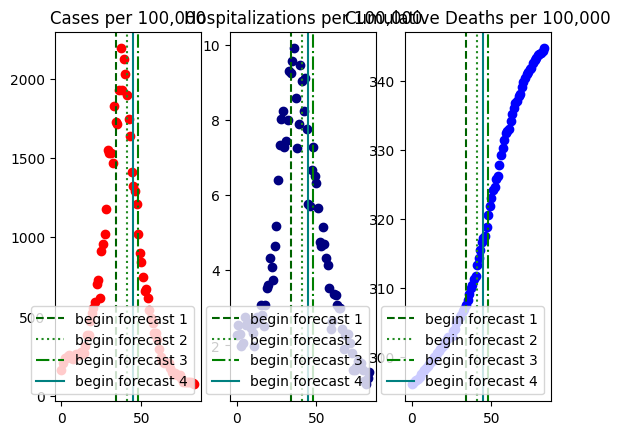

In [5]:
nys_pop = {
    "total": 19_340_000,
    "A0": 4597368.0, # New York State population aged 0 - 19
    "A1": 7893559.0, # New York State population aged 20 - 49
    "A2": 3878809.0, # New York State population aged 50 - 64
    "A3": 2970264.0, # New York State population aged 65+ 
}
N = nys_pop["total"]
plt = plot_case_hosp_death_data(N, all_data4, forecast1_start=34, forecast2_start=41, forecast3_start=48, forecast4_start=45)
plt.savefig(FIGURE_PATH + "T3data.png")

# (1) Forecast 1: 01/04/2022 - 02/01/2022

## (A) Calibrate and sample an ensemble of one model

In [6]:
# RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of3_results_Jan042022.csv"
# QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of3_quantiles_Jan042022.csv"
N_ITERATIONS = 50

### MODEL 1 - SEIRHD with NPI of Type 1

In [10]:
# num_samples = 100
# models = [model1]
# data_location = DATA_PATH + "NYS_T3_forecast1.csv"
# weights = [1]
# solution_mappings = [{"I": "I", "E": "E", "H": "H", "D": "D"}]

# # Run the calibration and sampling
# result1A1 = load_and_calibrate_and_sample_ensemble_model(
#     models,
#     data_location,
#     weights,
#     solution_mappings,
#     num_samples,
#     timepoints1,
#     verbose=True,
#     total_population=19340000,
#     num_iterations=N_ITERATIONS,
#     time_unit="days",
#     visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
# )

# # Plot results
# schema = plots.trajectories(pd.DataFrame(result1A1["data"]), keep=".*_sol",
#                             points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
#                            )
# schema = plots.pad(schema, 5)
# plots.save_schema(schema, FIGURE_PATH + "T3results1A1.json")
# plots.ipy_display(schema)

### Post-process and save results, formatted quantiles

In [ ]:
RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of1_results_Jul152020.csv"
QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of1_quantiles_Jul152020.csv"

# Define functions to get incident cases, hospitalizations, and deaths
def get_incident_cases(delta, exposed): # delta * Exposed
    return delta * exposed

def get_incident_hosp(eta, gamma, infectious): # eta * gamma * Infectious
    return eta * gamma * infectious

def get_incident_deaths(mu, los, hospitalized): # (mu/los) * Hospitalized
    return (mu/los) * hospitalized

# results_df = result1A1["data"]
# results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases(row['model_0/delta_param'], row['E_sol']), axis=1)
# results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp(row['model_0/eta_param'], row['model_0/gamma_param'], row['I_sol']), axis=1)
# results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths(row['model_0/mu_param'], row['model_0/los_param'], row['H_sol']), axis=1)

# # Save processed results
# # results_df.to_csv(RESULTS_FILENAME, index=False)
# process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints1, train_data1, "2022-01-03", "New York State")

### MODEL 2 - Age-Structured SEIRHD with NPI of Type I, Model Version 2

In [29]:
num_samples = 100
models = [model2]
data_location = DATA_PATH + "NYS_T3_forecast4.csv" #"NYS_T3_forecast1.csv"
weights = [1]
solution_mappings = [{"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}]

# Run the calibration and sampling
result1A2 = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints4,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result1A2["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "T3results1A12.json")
plots.ipy_display(schema)

iteration 0: loss = 13889.939295232296
iteration 25: loss = 11063.29481714964



In [28]:
schema = plots.trajectories(pd.DataFrame(result1A2["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "T3results1A12.json")
plots.ipy_display(schema)

result1A2["data"]

timepoint_id  sample_id  model_0/beta_c_param  model_0/beta_s_param   
0                 0          0              0.121189              0.750345  \
1                 1          0              0.121189              0.750345   
2                 2          0              0.121189              0.750345   
3                 3          0              0.121189              0.750345   
4                 4          0              0.121189              0.750345   
...             ...        ...                   ...                   ...   
83095           826         99              0.119402              0.746164   
83096           827         99              0.119402              0.746164   
83097           828         99              0.119402              0.746164   
83098           829         99              0.119402              0.746164   
83099           830         99              0.119402              0.746164   

       model_0/eta_0_param  model_0/gamma_param  model_0/eta_1_param   
0                 0.018690             0.150912             0.036637  \
1                 0.018690             0.150912             0.036637   
2                 0.018690             0.150912             0.036637   
3                 0.018690             0.150912             0.036637   
4                 0.018690             0.150912             0.036637   
...                    ...                  ...                  ...   
83095             0.015733             0.148747             0.034931   
83096             0.015733             0.148747             0.034931   
83097             0.015733             0.148747             0.034931   
83098             0.015733             0.148747             0.034931   
83099             0.015733             0.148747             0.034931   

       model_0/eta_2_param  model_0/eta_3_param  model_0/mu_0_param  ...   
0                 0.026923             0.127504            0.054549  ...  \
1                 0.026923             0.127504            0.054549  ...   
2                 0.026923             0.127504            0.054549  ...   
3                 0.026923             0.127504            0.054549  ...   
4                 0.026923             0.127504            0.054549  ...   
...                    ...                  ...                 ...  ...   
83095             0.031526             0.113809            0.027853  ...   
83096             0.031526             0.113809            0.027853  ...   
83097             0.031526             0.113809            0.027853  ...   
83098             0.031526             0.113809            0.027853  ...   
83099             0.031526             0.113809            0.027853  ...   

              D_sol       I0_sol       I1_sol        I2_sol        I3_sol   
0      57251.000000   921.000000  1000.000000  10000.000000  20000.000000  \
1      57251.988281   916.391357   999.243835   9868.022461  20169.847656   
2      57252.945312   915.267029  1011.800110   9738.884766  20333.140625   
3      57254.046875   917.499512  1037.163208   9612.510742  20490.152344   
4      57255.214844   922.960510  1074.842163   9488.851562  20641.042969   
...             ...          ...          ...           ...           ...   
83095  70453.335938  1356.263306  5081.173340    482.046265   2830.434326   
83096  70455.695312  1344.867920  5038.481934    477.995758   2806.651123   
83097  70458.039062  1333.567627  4996.145508    473.979034   2783.066406   
83098  70460.359375  1322.362793  4954.167480    469.996307   2759.681152   
83099  70462.656250  1311.252075  4912.542480    466.047058   2736.492188   

          H0_sol      H1_sol      H2_sol      H3_sol  timepoint_days  
0       3.000000   40.000000  200.000000  200.000000             0.0  
1       3.156420   39.754631  201.170914  235.537628             0.1  
2       3.306918   39.517139  202.271774  270.888489             0.2  
3       3.452642   39.294937  203.306015  306.044342             0.3  
4       3.59

### Post-process and save results, formatted quantiles

In [ ]:
# results_df = result1A2["data"]
# results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases(row['model_0/delta_param'], row['E_sol']), axis=1)
# results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp(row['model_0/eta_param'], row['model_0/gamma_param'], row['I_sol']), axis=1)
# results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths(row['model_0/mu_param'], row['model_0/los_param'], row['H_sol']), axis=1)

# # Save processed results
# results_df.to_csv(RESULTS_FILENAME, index=False)
# process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints1, train_data1, "2022-01-03", "New York State")

### MODEL 3 - Age-Structured SEIRHD with NPI of Type I, Model Version 3

In [31]:
num_samples = 100
models = [model3]
data_location = DATA_PATH + "NYS_T3_forecast1.csv"
weights = [1]
solution_mappings = [{"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}]

# Run the calibration and sampling
result1A3 = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints1,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result1A3["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "T3results1A3.json")
plots.ipy_display(schema)

iteration 0: loss = 4369.725395619869
iteration 25: loss = 2227.7158183455467



In [30]:
schema = plots.trajectories(pd.DataFrame(result1A3["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "T3results1A3.json")
plots.ipy_display(schema)

result1A3["data"]

timepoint_id  sample_id  model_0/beta_c_param  model_0/kappa_param   
0                 0          0              0.171112             0.846897  \
1                 1          0              0.171112             0.846897   
2                 2          0              0.171112             0.846897   
3                 3          0              0.171112             0.846897   
4                 4          0              0.171112             0.846897   
...             ...        ...                   ...                  ...   
62095           616         99              0.171298             0.846109   
62096           617         99              0.171298             0.846109   
62097           618         99              0.171298             0.846109   
62098           619         99              0.171298             0.846109   
62099           620         99              0.171298             0.846109   

       model_0/t_0_param  model_0/eta_0_param  model_0/gamma_param   
0              31.157116             0.022723             0.188879  \
1              31.157116             0.022723             0.188879   
2              31.157116             0.022723             0.188879   
3              31.157116             0.022723             0.188879   
4              31.157116             0.022723             0.188879   
...                  ...                  ...                  ...   
62095          30.998318             0.048188             0.185642   
62096          30.998318             0.048188             0.185642   
62097          30.998318             0.048188             0.185642   
62098          30.998318             0.048188             0.185642   
62099          30.998318             0.048188             0.185642   

       model_0/eta_1_param  model_0/eta_2_param  model_0/eta_3_param  ...   
0                 0.049979             0.085099             0.039028  ...  \
1                 0.049979             0.085099             0.039028  ...   
2                 0.049979             0.085099             0.039028  ...   
3                 0.049979             0.085099             0.039028  ...   
4                 0.049979             0.085099             0.039028  ...   
...                    ...                  ...                  ...  ...   
62095             0.039670             0.055525             0.066925  ...   
62096             0.039670             0.055525             0.066925  ...   
62097             0.039670             0.055525             0.066925  ...   
62098             0.039670             0.055525             0.066925  ...   
62099             0.039670             0.055525             0.066925  ...   

              D_sol       I0_sol        I1_sol        I2_sol        I3_sol   
0      57251.000000   921.000000   1000.000000  10000.000000  20000.000000  \
1      57253.015625   913.168701    996.359009   9830.747070  20094.783203   
2      57255.140625   909.342407   1007.739441   9665.673828  20184.751953   
3      57257.375000   909.341492   1033.455933   9504.679688  20270.048828   
4      57259.718750   912.994995   1072.854980   9347.645508  20350.822266   
...             ...          ...           ...           ...           ...   
62095  75938.671875  4823.968262  18072.792969   1714.493774  10067.222656   
62096  75954.695312  4776.736328  17895.851562   1697.707031   9968.646484   
62097  75970.585938  4729.963379  17720.628906   1681.083496   9871.026367   
62098  75986.343750  4683.639648  17547.093750   1664.620117   9774.344727   
62099  76001.843750  4637.777832  17375.220703   1648.313599   9678.631836   

           H0_sol       H1_sol      H2_sol       H3_sol  timepoint_days  
0        3.000000    40.000000  200.000000   200.000000             0.0  
1        3.288614    40.139664  212.986359   211.836700             0.1  
2        3.565318    40.280254  225.521744   223.573105             0.2  
3        3.832153    40.435459  237.619232   235.207153             0.3  
4        

### Post-process and save results, formatted quantiles

In [ ]:
RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of1_results_Jul142021.csv"
QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of1_quantiles_Jul142021.csv"

# Define functions to get incident cases, hospitalizations, and deaths
def get_incident_cases01(delta, exposed): # delta * Exposed
    return delta * exposed

def get_incident_hosp01(eta0, eta1, eta2, eta3, gamma, I0, I1, I2, I3): # eta * gamma * Infectious
    return gamma * (eta0 * I0 + eta1 * I1 + eta2 * I2 + eta3 * I3)

def get_incident_deaths01(mu0, mu1, mu2, mu3, los0, los1, los2, los3, H0, H1, H2, H3): # (mu/los) * Hospitalized
    return (mu0 / los0) * H0 + (mu1 / los1) * H1 + (mu2 / los2) * H2 + (mu3 / los3) * H3

results_df = result1A3["data"]
results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases01(row['model_0/delta_param'], row['E_sol']), axis=1)

results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp01(row['model_0/eta_0_param'], row['model_0/eta_1_param'], row['model_0/eta_2_param'], row['model_0/eta_3_param'], 
                                                                                          row['model_0/gamma_param'], row['I0_sol'], row['I1_sol'], row['I2_sol'], row['I3_sol']), axis=1)

results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths01(row['model_0/mu_0_param'], row['model_0/mu_1_param'], row['model_0/mu_2_param'], row['model_0/mu_3_param'], 
                                                                                     row['model_0/los_0_param'], row['model_0/los_1_param'], row['model_0/los_2_param'], row['model_0/los_3_param'],  
                                                                                     row['H0_sol'], row['H1_sol'], row['H2_sol'], row['H3_sol']), axis=1)

# Save processed results
# results_df.to_csv(RESULTS_FILENAME, index=False)
process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints1, train_data1, "2022-01-03", "New York State")

## (B) Calibrate and sample an ensemble of multiple models

In [ ]:
num_samples = 100
models = [model1, model2, model3]
data_location = DATA_PATH + "NYS_T3_forecast1.csv"
weights = [1/len(models) for i in models]
solution_mappings = [{"I": "I", "E": "E", "H": "H", "D": "D"},
                     {"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}, 
                     {"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}
                     ]

# Run the calibration and sampling
result1B1 = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints1,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result1B1["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "T3results1B1.json")
plots.ipy_display(schema)

In [ ]:
num_samples = 100
models = [model2, model3]
data_location = DATA_PATH + "NYS_T3_forecast1.csv"
weights = [1/len(models) for i in models]
solution_mappings = [{"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}, 
                     {"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}
                     ]

# Run the calibration and sampling
result1B2 = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints1,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result1B2["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "resultsT31B2.json")
plots.ipy_display(schema)

### Post-process and save results, formatted quantiles

In [ ]:
RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of2_results_Jan042022.csv"
QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of2_quantiles_Jan042022.csv"
# result1B3["data"].keys()

# Define functions to get incident cases, hospitalizations, and deaths
def get_incident_cases_ensemble2(weight0, delta0, weight1, delta1, exposed): # delta * Exposed
    return (weight0*delta0 + weight1*delta1) * exposed

def get_incident_hosp_ensemble2(weight0, eta00, eta01, eta02, eta03, gamma0, 
                                   weight1, eta10, eta11, eta12, eta13, gamma1, I0, I1, I2, I3): # eta * gamma * Infectious
    inc_hosp = ((weight0 * gamma0 * eta00 + weight1 * gamma1 * eta10) * I0 
        + (weight0 * gamma0 * eta01 + weight1 * gamma1 * eta11) * I1 
        + (weight0 * gamma0 * eta02 + weight1 * gamma1 * eta12) * I2 
        + (weight0 * gamma0 * eta03 + weight1 * gamma1 * eta13) * I3)
    return inc_hosp

def get_incident_deaths_ensemble2(weight0, mu00, mu01, mu02, mu03, los00, los01, los02, los03, 
                                   weight1, mu10, mu11, mu12, mu13, los10, los11, los12, los13, H0, H1, H2, H3): # (mu/los) * Hospitalized
    inc_deaths = ((weight0 * (mu00 / los00) + weight1 * (mu10 / los10)) * H0 
        + (weight0 * (mu01 / los01) + weight1 * (mu11 / los11)) * H1 
        + (weight0 * (mu02 / los02) + weight1 * (mu12 / los12)) * H2  
        + (weight0 * (mu03 / los03) + weight1 * (mu13 / los13)) * H3) 
    return inc_deaths

results_df = result1B2["data"]
results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases_ensemble2(row['model_0_weight'], row['model_0/delta_param'], 
                                                                                            row['model_1_weight'], row['model_1/delta_param'], row['E_sol']), axis=1)

results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp_ensemble2(row['model_0_weight'], row['model_0/eta_0_param'], row['model_0/eta_1_param'], row['model_0/eta_2_param'], 
                                                                                          row['model_0/eta_3_param'], row['model_0/gamma_param'],  
                                                                                          row['model_1_weight'], row['model_1/eta_0_param'], row['model_1/eta_1_param'], row['model_1/eta_2_param'], row['model_1/eta_3_param'], 
                                                                                          row['model_1/gamma_param'], row['I0_sol'], row['I1_sol'], row['I2_sol'], row['I3_sol']), axis=1)

results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths_ensemble2(row['model_0_weight'], row['model_0/mu_0_param'], row['model_0/mu_1_param'], row['model_0/mu_2_param'], 
                                                                                          row['model_0/mu_3_param'], row['model_0/los_0_param'], row['model_0/los_1_param'], row['model_0/los_2_param'], row['model_0/los_3_param'],  
                                                                                          row['model_1_weight'], row['model_1/mu_0_param'], row['model_1/mu_1_param'], row['model_1/mu_2_param'], row['model_1/mu_3_param'], 
                                                                                          row['model_1/los_0_param'], row['model_1/los_1_param'], row['model_1/los_2_param'], row['model_1/los_3_param'], 
                                                                                          row['H0_sol'], row['H1_sol'], row['H2_sol'], row['H3_sol']), axis=1)

# Save processed results
# results_df.to_csv(RESULTS_FILENAME, index=False)
process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints1, train_data1, "2022-01-03", "New York State")

# (2) Forecast 2: 01/11/2022 - 08/19/2021

## (A) Calibrate and sample an ensemble of one model

In [ ]:
N_ITERATIONS = 300
num_samples = 100
models = [model1]
data_location = DATA_PATH + "NYS_T3_forecast2.csv"
weights = [1]
solution_mappings = [{"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead"}]

# Run the calibration and sampling
result2A = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints2,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result2A["data"]), keep=".*_sol",
                            points=all_data2.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "resultsT32A.json")
plots.ipy_display(schema)

### Post-process and save results, formatted quantiles

In [ ]:
RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of1_results_Jan112022.csv"
QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of1_quantiles_Jan112022.csv"

results_df = result2A["data"]
results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases(row['model_0/delta_param'], row['E_sol']), axis=1)
results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp(row['model_0/eta_param'], row['model_0/gamma_param'], row['I_sol']), axis=1)
results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths(row['model_0/mu_param'], row['model_0/los_param'], row['H_sol']), axis=1)

# Save processed results
# results_df.to_csv(RESULTS_FILENAME, index=False)
process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints2, train_data2, "2022-01-10", "New York State")

## (B) Calibrate and sample an ensemble of multiple models

In [ ]:
num_samples = 100
models = [model2, model3]
data_location = DATA_PATH + "NYS_T3_forecast2.csv"
weights = [1/len(models) for i in models]
solution_mappings = [{"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}, 
                     {"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}
                     ]

# Run the calibration and sampling
result2B = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints2,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result2B["data"]), keep=".*_sol",
                            points=all_data2.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "resultsT32B.json")
plots.ipy_display(schema)

### Post-process and save results, formatted quantiles

In [ ]:
RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of2_results_Jan112022.csv"
QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of2_quantiles_Jan112022.csv"

results_df = result2B["data"]
results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases_ensemble2(row['model_0_weight'], row['model_0/delta_param'], 
                                                                                            row['model_1_weight'], row['model_1/delta_param'], row['E_sol']), axis=1)

results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp_ensemble2(row['model_0_weight'], row['model_0/eta_0_param'], row['model_0/eta_1_param'], row['model_0/eta_2_param'], 
                                                                                          row['model_0/eta_3_param'], row['model_0/gamma_param'],  
                                                                                          row['model_1_weight'], row['model_1/eta_0_param'], row['model_1/eta_1_param'], row['model_1/eta_2_param'], row['model_1/eta_3_param'], 
                                                                                          row['model_1/gamma_param'], row['I0_sol'], row['I1_sol'], row['I2_sol'], row['I3_sol']), axis=1)

results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths_ensemble2(row['model_0_weight'], row['model_0/mu_0_param'], row['model_0/mu_1_param'], row['model_0/mu_2_param'], 
                                                                                          row['model_0/mu_3_param'], row['model_0/los_0_param'], row['model_0/los_1_param'], row['model_0/los_2_param'], row['model_0/los_3_param'],  
                                                                                          row['model_1_weight'], row['model_1/mu_0_param'], row['model_1/mu_1_param'], row['model_1/mu_2_param'], row['model_1/mu_3_param'], 
                                                                                          row['model_1/los_0_param'], row['model_1/los_1_param'], row['model_1/los_2_param'], row['model_1/los_3_param'], 
                                                                                          row['H0_sol'], row['H1_sol'], row['H2_sol'], row['H3_sol']), axis=1)

# Save processed results
# results_df.to_csv(RESULTS_FILENAME, index=False)
process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints2, train_data2, "2022-01-10", "New York State")

# (3) Forecast 3: 01/18/2022 - 08/26/2021

## (A) Calibrate and sample an ensemble of one model

In [ ]:
num_samples = 100
models = [model1]
data_location = DATA_PATH + "NYS_T3_forecast3.csv"
weights = [1]
solution_mappings = [{"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead"}]

# Run the calibration and sampling
result3A = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints3,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result3A["data"]), keep=".*_sol",
                            points=all_data3.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "resultsT33A.json")
plots.ipy_display(schema)

### Post-process and save results, formatted quantiles

In [ ]:
RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of1_results_Jan182022.csv"
QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of1_quantiles_Jan182022.csv"

results_df = result3A["data"]
results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases(row['model_0/delta_param'], row['E_sol']), axis=1)
results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp(row['model_0/eta_param'], row['model_0/gamma_param'], row['I_sol']), axis=1)
results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths(row['model_0/mu_param'], row['model_0/los_param'], row['H_sol']), axis=1)

# Save processed results
# results_df.to_csv(RESULTS_FILENAME, index=False)
process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints3, train_data3, "2022-01-17", "New York State")

## (B) Calibrate and sample an ensemble of multiple models

In [ ]:
num_samples = 100
models = [model2, model3]
data_location = DATA_PATH + "NYS_T3_forecast3.csv"
weights = [1/len(models) for i in models]
solution_mappings = [{"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}, 
                     {"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}
                     ]

# Run the calibration and sampling
result3B = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints3,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result3B["data"]), keep=".*_sol",
                            points=all_data3.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "resultsT33B.json")
plots.ipy_display(schema)

### Post-process and save results, formatted quantiles

In [ ]:
RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of2_results_Jan182022.csv"
QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of2_quantiles_Jan182022.csv"

results_df = result3B["data"]
results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases_ensemble2(row['model_0_weight'], row['model_0/delta_param'], 
                                                                                            row['model_1_weight'], row['model_1/delta_param'], row['E_sol']), axis=1)

results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp_ensemble2(row['model_0_weight'], row['model_0/eta_0_param'], row['model_0/eta_1_param'], row['model_0/eta_2_param'], 
                                                                                          row['model_0/eta_3_param'], row['model_0/gamma_param'],  
                                                                                          row['model_1_weight'], row['model_1/eta_0_param'], row['model_1/eta_1_param'], row['model_1/eta_2_param'], row['model_1/eta_3_param'], 
                                                                                          row['model_1/gamma_param'], row['I0_sol'], row['I1_sol'], row['I2_sol'], row['I3_sol']), axis=1)

results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths_ensemble2(row['model_0_weight'], row['model_0/mu_0_param'], row['model_0/mu_1_param'], row['model_0/mu_2_param'], 
                                                                                          row['model_0/mu_3_param'], row['model_0/los_0_param'], row['model_0/los_1_param'], row['model_0/los_2_param'], row['model_0/los_3_param'],  
                                                                                          row['model_1_weight'], row['model_1/mu_0_param'], row['model_1/mu_1_param'], row['model_1/mu_2_param'], row['model_1/mu_3_param'], 
                                                                                          row['model_1/los_0_param'], row['model_1/los_1_param'], row['model_1/los_2_param'], row['model_1/los_3_param'], 
                                                                                          row['H0_sol'], row['H1_sol'], row['H2_sol'], row['H3_sol']), axis=1)

# Save processed results
# results_df.to_csv(RESULTS_FILENAME, index=False)
process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints3, train_data3, "2022-01-17", "New York State")

# (4) Forecast 4: 01/25/2022 - 09/02/2021

## (A) Calibrate and sample an ensemble of one model

In [ ]:
num_samples = 100
models = [model3]
data_location = DATA_PATH + "NYS_T3_forecast4.csv"
weights = [1]
solution_mappings = [{"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}]

# Run the calibration and sampling
result4A = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints4,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result4A["data"]), keep=".*_sol",
                            points=all_data4.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "resultsT34A.json")
plots.ipy_display(schema)

### Post-process and save results, formatted quantiles

In [ ]:
RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of1_results_Jan252022.csv"
QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of1_quantiles_Jan252022.csv"

# Define functions to get incident cases, hospitalizations, and deaths
def get_incident_cases01(delta, exposed): # delta * Exposed
    return delta * exposed

def get_incident_hosp01(eta0, eta1, eta2, eta3, gamma, I0, I1, I2, I3): # eta * gamma * Infectious
    return gamma * (eta0 * I0 + eta1 * I1 + eta2 * I2 + eta3 * I3)

def get_incident_deaths01(mu0, mu1, mu2, mu3, los0, los1, los2, los3, H0, H1, H2, H3): # (mu/los) * Hospitalized
    return (mu0 / los0) * H0 + (mu1 / los1) * H1 + (mu2 / los2) * H2 + (mu3 / los3) * H3

results_df = result4A["data"]
results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases01(row['model_0/delta_param'], row['E_sol']), axis=1)

results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp01(row['model_0/eta_0_param'], row['model_0/eta_1_param'], row['model_0/eta_2_param'], row['model_0/eta_3_param'], 
                                                                                          row['model_0/gamma_param'], row['I0_sol'], row['I1_sol'], row['I2_sol'], row['I3_sol']), axis=1)

results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths01(row['model_0/mu_0_param'], row['model_0/mu_1_param'], row['model_0/mu_2_param'], row['model_0/mu_3_param'], 
                                                                                     row['model_0/los_0_param'], row['model_0/los_1_param'], row['model_0/los_2_param'], row['model_0/los_3_param'],  
                                                                                     row['H0_sol'], row['H1_sol'], row['H2_sol'], row['H3_sol']), axis=1)

# Save processed results
# results_df.to_csv(RESULTS_FILENAME, index=False)
process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints4, train_data4, "2022-01-24", "New York State")

## (B) Calibrate and sample an ensemble of multiple models

In [ ]:
num_samples = 100
models = [model2, model3]
data_location = DATA_PATH + "NYS_T3_forecast4.csv"
weights = [1/len(models) for i in models]
solution_mappings = [{"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}, 
                     {"I": "infected", "E": "exposed", "H": "hospitalized", "D": "dead", "I0": "I0", "I1": "I1", "I2": "I2", "I3": "I3", "H0": "H0", "H1": "H1", "H2": "H2", "H3": "H3"}
                     ]

# Run the calibration and sampling
result4B = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints4,
    verbose=True,
    total_population=19340000,
    num_iterations=N_ITERATIONS,
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Plot results
schema = plots.trajectories(pd.DataFrame(result4B["data"]), keep=".*_sol",
                            points=all_data4.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.save_schema(schema, FIGURE_PATH + "resultsT34B.json")
plots.ipy_display(schema)

### Post-process and save results, formatted quantiles

In [ ]:
RESULTS_FILENAME = RESULTS_PATH + "T3_ensemble_of2_results_Jan252022.csv"
QUANTILES_FILENAME = RESULTS_PATH + "T3_ensemble_of2_quantiles_Jan252022.csv"

results_df = result4B["data"]
results_df["Incident_Cases_sol"] = results_df.apply(lambda row: get_incident_cases_ensemble2(row['model_0_weight'], row['model_0/delta_param'], 
                                                                                            row['model_1_weight'], row['model_1/delta_param'], row['E_sol']), axis=1)

results_df["Incident_Hosp_sol"] = results_df.apply(lambda row: get_incident_hosp_ensemble2(row['model_0_weight'], row['model_0/eta_0_param'], row['model_0/eta_1_param'], row['model_0/eta_2_param'], 
                                                                                          row['model_0/eta_3_param'], row['model_0/gamma_param'],  
                                                                                          row['model_1_weight'], row['model_1/eta_0_param'], row['model_1/eta_1_param'], row['model_1/eta_2_param'], row['model_1/eta_3_param'], 
                                                                                          row['model_1/gamma_param'], row['I0_sol'], row['I1_sol'], row['I2_sol'], row['I3_sol']), axis=1)

results_df["Incident_Deaths_sol"] = results_df.apply(lambda row: get_incident_deaths_ensemble2(row['model_0_weight'], row['model_0/mu_0_param'], row['model_0/mu_1_param'], row['model_0/mu_2_param'], 
                                                                                          row['model_0/mu_3_param'], row['model_0/los_0_param'], row['model_0/los_1_param'], row['model_0/los_2_param'], row['model_0/los_3_param'],  
                                                                                          row['model_1_weight'], row['model_1/mu_0_param'], row['model_1/mu_1_param'], row['model_1/mu_2_param'], row['model_1/mu_3_param'], 
                                                                                          row['model_1/los_0_param'], row['model_1/los_1_param'], row['model_1/los_2_param'], row['model_1/los_3_param'], 
                                                                                          row['H0_sol'], row['H1_sol'], row['H2_sol'], row['H3_sol']), axis=1)

# Save processed results
# results_df.to_csv(RESULTS_FILENAME, index=False)
process_and_save_quantiles(results_df, QUANTILES_FILENAME, timepoints4, train_data4, "2022-01-24", "New York State")